In [1]:
import sys
import os
import requests
import json

import pandas as pd
import numpy as np

import seaborn as sns
# import matplotlib
import matplotlib.pyplot as plt # Typical way of import MPL
import matplotlib as mpl # This line is used less frequently

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [2]:

file='../data/additional-features/additional-features.json'
f=open(file)
data=pd.read_json(f)

In [3]:
#remove risk and score attributes, remove the first and last row 
data=data.transpose()
data=data.drop(columns=['risk','score'],axis=1)
data=data.drop(['{file}','0'])

In [4]:
data.head()
data.shape
data.describe()

,date,index,location,now frequency,stock,time,urgent frequency,wrong cap ratio,attacker estimated age,attacker relationship,...,sentiment analysis,social_engineering,stock_close,stock_open,stock_volume,title,unknown count,wrongspellnumber,ip_risk,ip_score
count,4029,4029,3923,4029,947,4029,4029,4029,3981.000000,3906,...,4029,4029,3082.0,3082.000000,3082,4028,3894,4028,516,516
unique,1389,4029,639,12,1,3721,9,431,3296.000000,7,...,4,2,1013.0,1011.000000,1001,5,39,126,4,31
top,unknown,1,"[{'lat': 37.09024, 'lng': -95.712891}]",0,unknown,unknown,0,0.069,29.826298,"[online, friend of a friend, person]",...,neutral,1,1122.5,1116.640015,1251700000,Name,0,13,low,0
freq,53,1,284,1951,947,53,2356,71,10.000000,3314,...,2377,3056,15.0,15.000000,16,2210,930,188,415,285


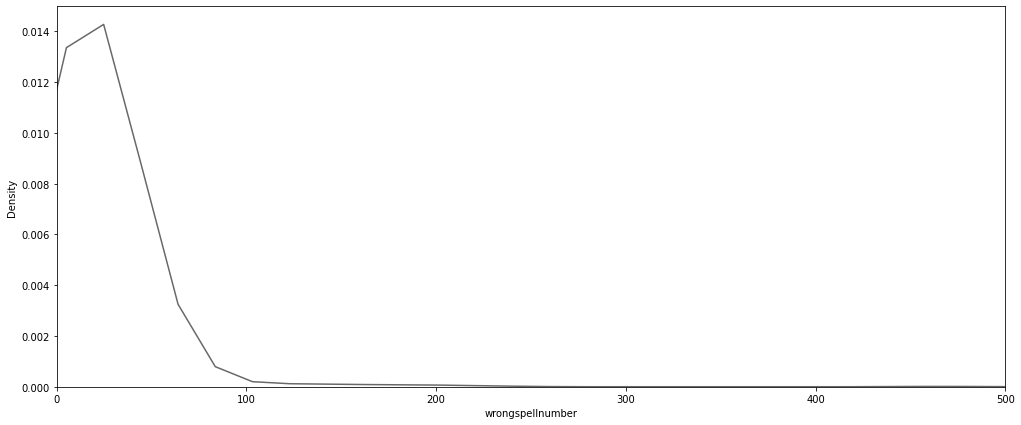

In [5]:
#density plot of wrongspellnumber
plt.rcParams['figure.figsize'] = (17, 7)
wrongspell=data[data['wrongspellnumber'] != 'N/A']['wrongspellnumber'].dropna()
plt.xlim(0, 500)
ax = sns.distplot(wrongspell,hist=False,
                  bins=10, color='#686868')

In [6]:
title=data['title'].dropna()
title.unique()

array(['General Prefix', 'Royal', 'Name', 'Occupation', 'Not available'],
      dtype=object)

Text(0.5, 0, 'Titles')

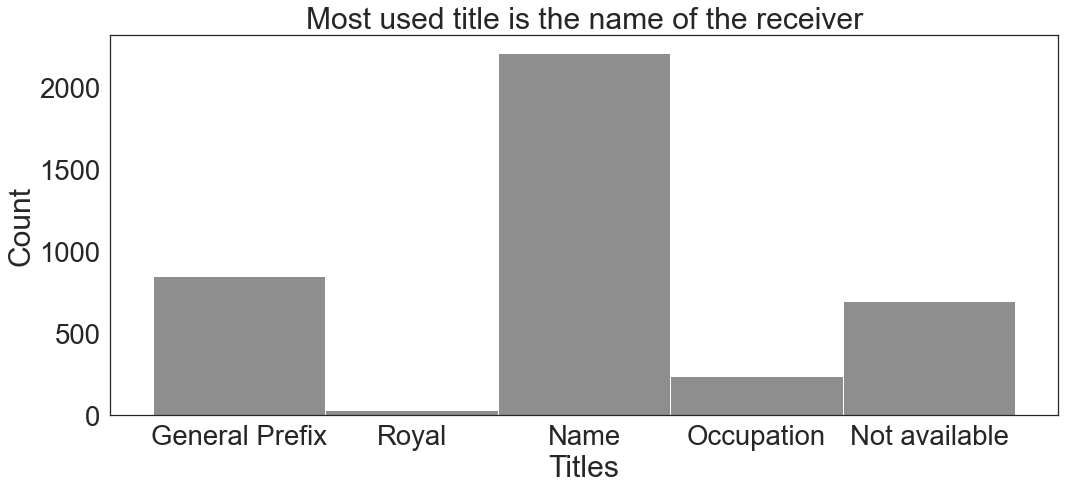

In [7]:
#histogram of most used title
sns.set(font_scale=2.5, style="white")
sns.despine()
t=sns.histplot(data=title,color='#686868')
t.set_title('Most used title is the name of the receiver')
t.set_ylabel('Count')
t.set_xlabel('Titles')


Text(0.5, 0, 'ip_risk')

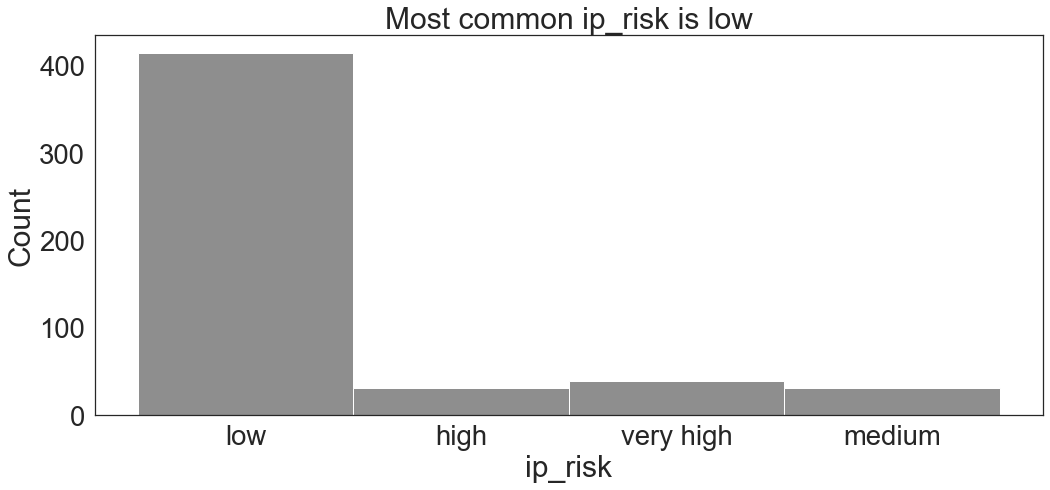

In [8]:
sns.set(font_scale=2.5, style="white")
sns.despine()
t=sns.histplot(data=data['ip_risk'].dropna(),color='#686868')
t.set_title('Most common ip_risk is low')
t.set_ylabel('Count')
t.set_xlabel('ip_risk')

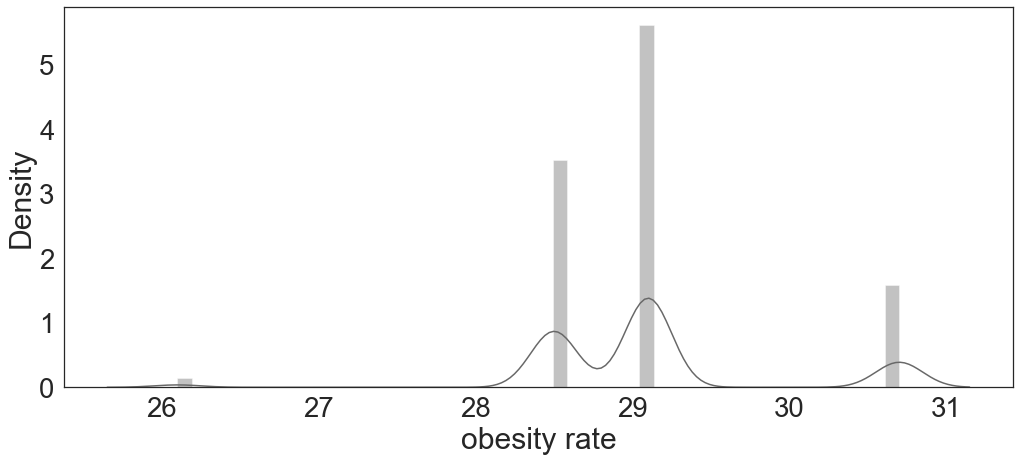

In [9]:
obesity=data[data['obesity rate'] != 'N/A']['obesity rate']
o=sns.distplot(obesity,color='#686868')


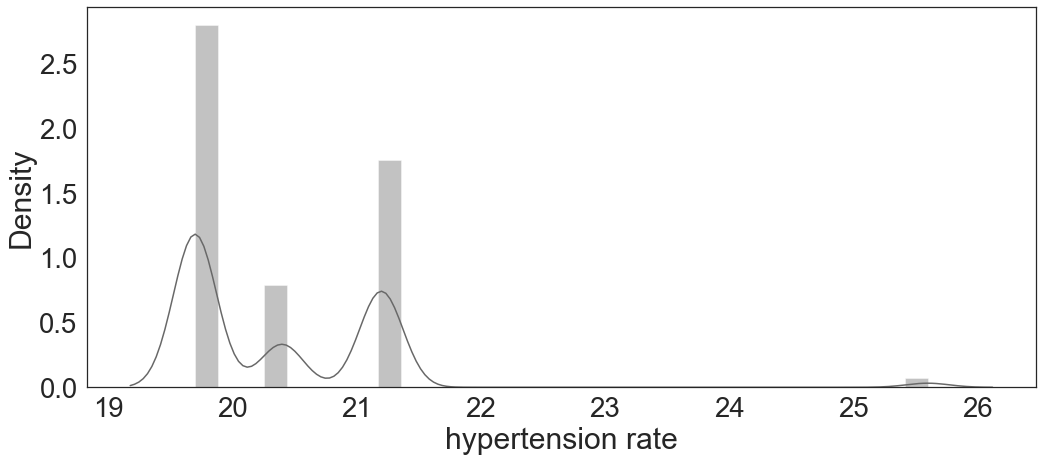

In [10]:
hyp=data[data['hypertension rate'] != 'N/A']['hypertension rate']
h=sns.distplot(hyp,color='#686868')

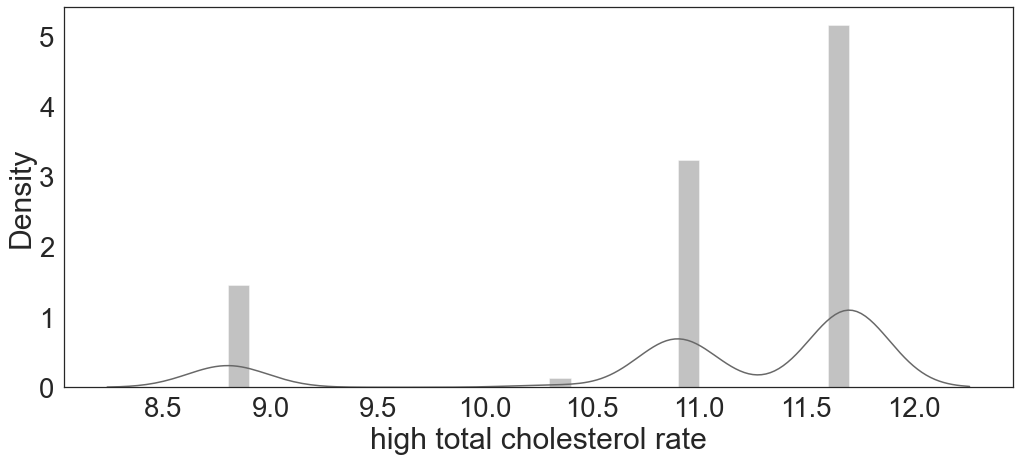

In [11]:
ht=data[data['high total cholesterol rate'] != 'N/A']['high total cholesterol rate']
o=sns.distplot(ht,color='#686868')

In [12]:
date_spell=data[['wrongspellnumber','date']].dropna()
date_spell=date_spell[date_spell['wrongspellnumber']!='N/A']
date_spell


,wrongspellnumber,date
1,27,10/30/02
2,14,10/31/02
3,21,10/31/02
4,22,10/31/02
5,21,11/01/02
...,...,...
4025,18,09/17/07
4026,12,09/17/07
4027,27,09/18/07
4028,22,09/18/07


In [13]:
#搞不定了，画不动了，一直报错了
#date=datetime.strptime(date_spell['date'],'%x')
#for i in range(len(date_spell['date'])):
 #   date_spell['year'][i]=date_spell['date'][i][-2:]

In [14]:
type(data['date'][2])

str

In [16]:
info = pd.read_json('../data/additional-features/additional-features.json',orient='index')

Text(0, 0.5, 'probability')

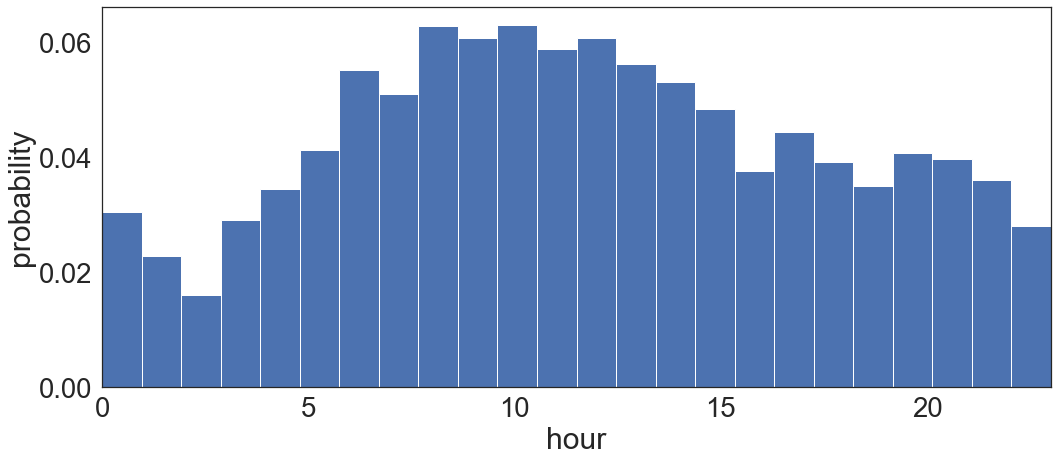

In [17]:
info2 = info[info['time'].str.len() == 8]
time = pd.to_datetime(info2['time'])
timelist = time.tolist()

tl = []
for i in timelist:
    if i.minute >= 30 and i.hour < 23:
        hour = i.hour + 1
    elif i.minute >= 30 and i.hour == 23:
        hour = 0
    else:
        hour = i.hour
    tl.append(hour)
# turn the time to its nearest hour

plt.hist(tl,density=True,bins = 24, rwidth = 1)
plt.xlim(0,23)
plt.xlabel('hour')
plt.ylabel('probability')

In [18]:
delta_price = info['stock_open']-info['stock_close']
# get the stock change for that day

Text(0.5, 0, 'Daily stock price change')

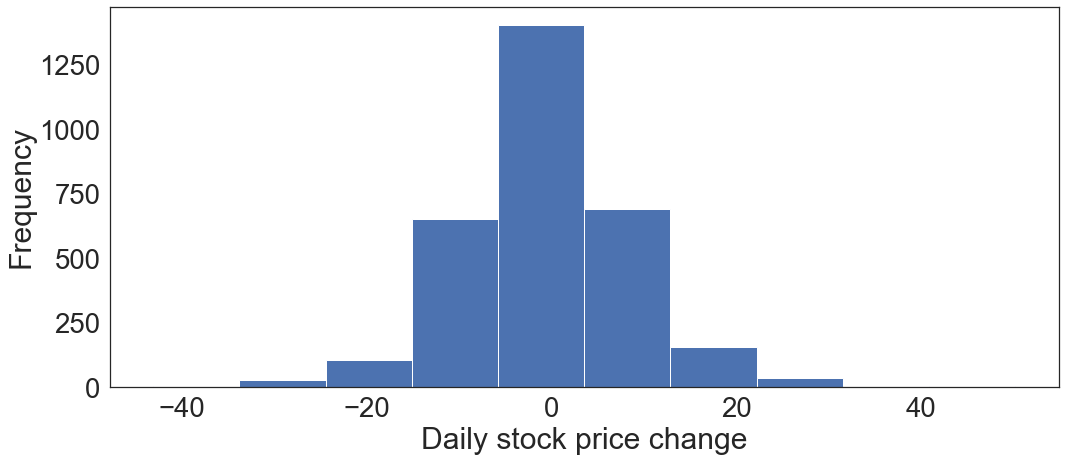

In [19]:
delta_price.plot.hist()
plt.xlabel('Daily stock price change')

Text(0.5, 0, 'stock volume')

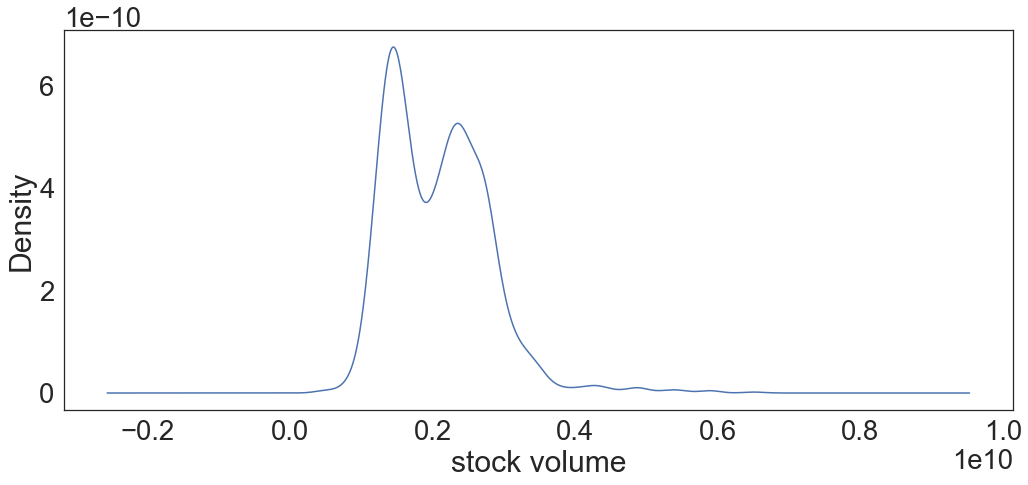

In [20]:
info['stock_volume'].plot.kde()
plt.xlabel('stock volume')
# Plot density curve for the stock volume

Text(0.5, 0, 'socail engineering or not?')

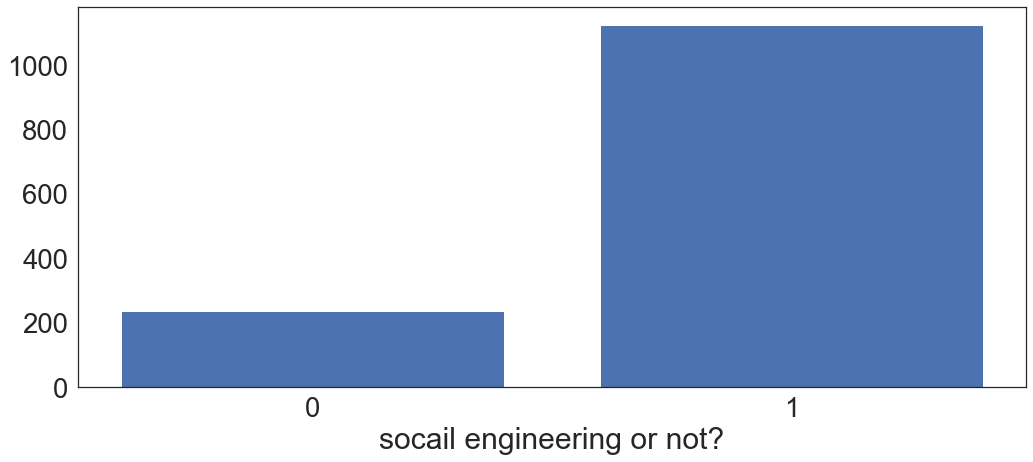

In [21]:
temp2 = info[info['reconnaissance']==1.0]
s_e = temp2['social_engineering'].tolist()
# Get a list of social engineering info of emails which were marked read
dict={}
for i in s_e:
    i = int(i)
    if i in dict.keys():
        dict[i] += 1
    else:
        dict[i] = 1
#         add the count to dictionary then bar plot it
plt.bar(dict.keys(),dict.values())
plt.xticks(range(0,2))
plt.xlabel('socail engineering or not?')

In [24]:
file = open('tika-similarity/data/cosine-circle.json')
cos = json.load(file)

In [25]:
cos_list = cos['children'][1]['children']
index_list = []
for item in cos_list:
    index = item['name'].replace('.json',' ').split()[0]
    index_list.append(int(index))
    
# get the index of files where similarity score is 0.91


In [31]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


df = info.iloc[index_list]
# find the features with these index

<AxesSubplot:>

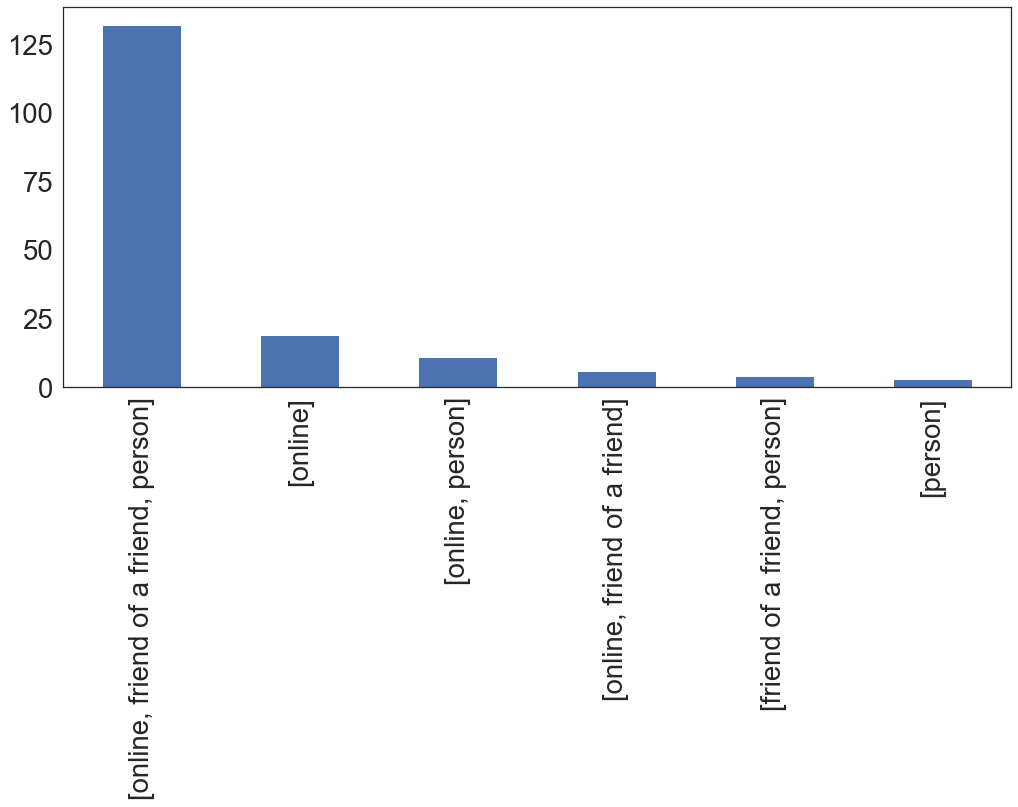

In [36]:
import matplotlib.pyplot as plt
df['attacker relationship'].value_counts().plot(kind='bar')